# TIME SERIES FORECASTING - ARIMA (Univariate Analysis)

# 1. Import libraries

In [2]:
#Open source time-series library
import pmdarima

In [3]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log

# 2. Import dataset

In [37]:
#Import dataset
df1 = pd.read_csv('Pricing.csv')
#Select the time series variable (Iron ore price index) to be foreacsted
df= df1[df1.columns[1]]
df

0      99.2
1      93.7
2      95.1
3      95.3
4      98.4
       ... 
97     89.2
98     93.7
99     93.9
100    92.8
101    85.1
Name: Iron Ore price index, Length: 102, dtype: float64

In [38]:
#Descriptive Statistics
df1.describe()

,Iron Ore price index,Limestone price index,Coking Coal price index,Petroleum Coke price index,Electricity price index,Zinc metal price index
count,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,82.57549,172.491176,111.322549,105.346078,104.363725,119.289216
std,19.21609,46.056184,15.253981,22.954077,3.626738,13.780054
min,43.80000,90.400000,100.000000,58.800000,94.800000,97.200000
25%,66.32500,143.325000,100.350000,92.850000,102.000000,109.150000
50%,89.05000,160.400000,101.400000,98.450000,104.200000,116.300000
75%,95.30000,216.025000,131.925000,112.475000,106.475000,131.450000
max,110.80000,255.000000,136.500000,160.000000,112.400000,142.400000


In [39]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        102 non-null    object 
 1   Iron Ore price index        102 non-null    float64
 2   Limestone price index       102 non-null    float64
 3   Coking Coal price index     102 non-null    float64
 4   Petroleum Coke price index  102 non-null    float64
 5   Electricity price index     102 non-null    float64
 6   Zinc metal price index      102 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.7+ KB


In [40]:
#Missing values 
df1.isnull().sum()

Date                          0
Iron Ore price index          0
Limestone price index         0
Coking Coal price index       0
Petroleum Coke price index    0
Electricity price index       0
Zinc metal price index        0
dtype: int64

# 3. Check for Stationary - Order of Differencing (d)
The data is stationary when
1. Mean is constant (the data revolves around mean)
2. Standard deviation is constant (the fluctuation in data are constant)

# 3. a) Statistical test - Adfuller test

 1. Null hypothesis - Series is not stationary
 2. Alternative hypothesis - Series is stationary
 
 Decision criteria - iF P VALUE  is greater than 0.05(>0.05), then series is not stationary

In [41]:

result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.320849
p-value: 0.619581


As the p-value, is greater than 0.5, we have to with differencing to make it stationary

In [42]:
#Statistical test for checking no. of lags req. for stationary time series
from pmdarima.arima.utils import ndiffs

## Adf (Dickey fuller) Test - check for stationary and tell the order of differencing 
print(ndiffs(df, test='adf'))

# KPSS test
print(ndiffs(df, test='kpss')) 

# PP test:
print(ndiffs(df, test='pp'))
#Lets take d =1

1
1
1


# 3.b) Visualizing Auto correlation for stationary

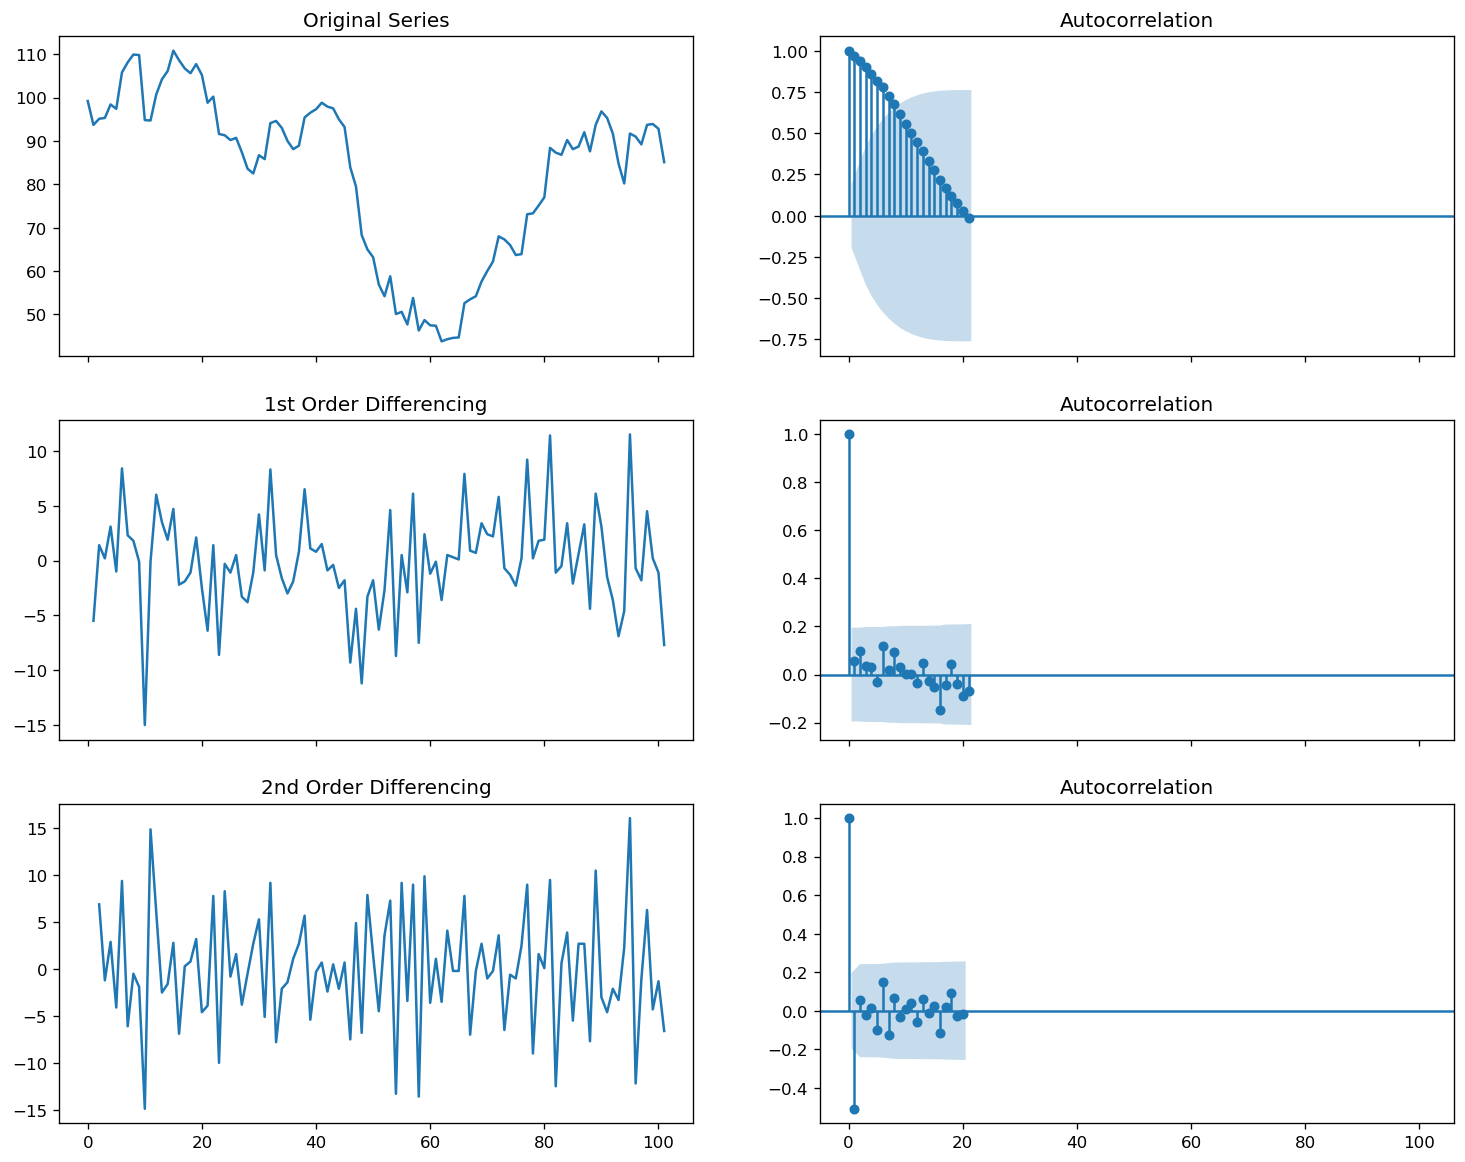

In [43]:
#Visualization for checking stationary
plt.rcParams.update({'figure.figsize':(15,12), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In original plot, the data is not stationary, as the mean and standard devation is not constant. The price of iro ore is fluctuating and not around mean.
We have visualized 1st Order differencing along with 2nd order differencing for the same.
Decision - The order of differencing(d) is - 1 (after statistical method and visualization)

# 4. Auto Regressive order (p)
The partail auto correaltion is plooted against 1st order of differencing. The lag which will be above significant level will be choosen as order of auto regression 

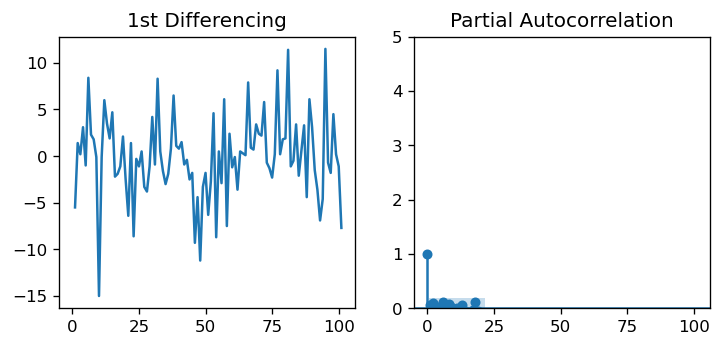

In [44]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.diff().dropna(), ax=axes[1])

plt.show()

#In PACF graph,lag 0 is above the significant level.Take p=0

# 5. Moving Averages order (q)
The auto correaltion is plooted against 1st order of differencing. The lag which will be above significant level will be choosen as order of auto regression.

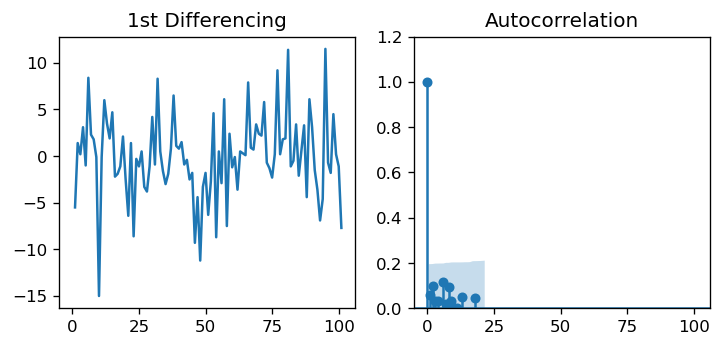

In [45]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.diff().dropna(), ax=axes[1])

plt.show()
# q=0

# 6. Building Model - ARIMA(p,d,q)

In [46]:
from statsmodels.tsa.arima_model import ARIMA
#Fitting the model with selected parameters
# 0,1,0 ARIMA Model
model = ARIMA(df, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARIMA Model Results                                
Dep. Variable:     D.Iron Ore price index   No. Observations:                  101
Model:                     ARIMA(0, 1, 0)   Log Likelihood                -294.106
Method:                               css   S.D. of innovations              4.450
Date:                    Sat, 28 Nov 2020   AIC                            592.213
Time:                            16:08:36   BIC                            597.443
Sample:                                 1   HQIC                           594.330
                                                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1396      0.443     -0.315      0.753      -1.008       0.728


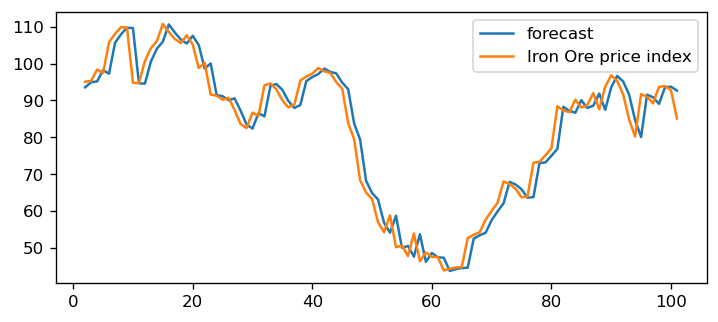

In [47]:
#Visualization of fitted model( Actual vs Forecast)
model_fit.plot_predict(dynamic=False)
plt.show()

The model fitted looks good as the actual v/s forecasted are quite close to each other.
For better understanding, we may create a train and test split.

# 7. Train-Test split

In [48]:
# Create Training and Test
train = df[:82]
test = df[82:]

                               ARIMA Model Results                                
Dep. Variable:     D.Iron Ore price index   No. Observations:                   81
Model:                     ARIMA(0, 1, 0)   Log Likelihood                -235.894
Method:                               css   S.D. of innovations              4.452
Date:                    Sat, 28 Nov 2020   AIC                            475.788
Time:                            16:08:46   BIC                            480.577
Sample:                                 1   HQIC                           477.709
                                                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1333      0.495     -0.270      0.788      -1.103       0.836


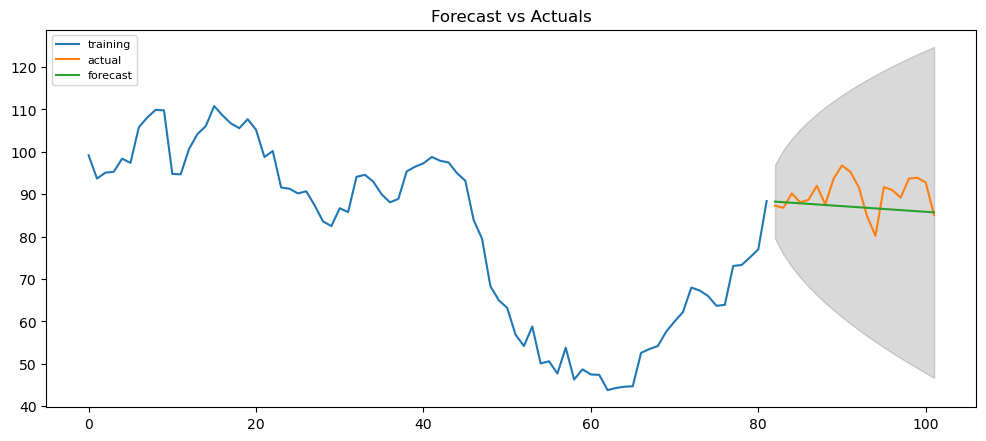

In [49]:
# Build Model
 
model = ARIMA(train, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [50]:
print(fc_series)

82     88.266667
83     88.133333
84     88.000000
85     87.866667
86     87.733333
87     87.600000
88     87.466667
89     87.333333
90     87.200000
91     87.066667
92     86.933333
93     86.800000
94     86.666667
95     86.533333
96     86.400000
97     86.266667
98     86.133333
99     86.000000
100    85.866667
101    85.733333
dtype: float64


In [51]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc_series,test)

<ipython-input-51-9bdafd733c89>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-51-9bdafd733c89>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-51-9bdafd733c89>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-51-9bdafd733c89>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.04551250433455315,
 'me': -3.0300000000000638,
 'mae': 4.1700000000000355,
 'mpe': -0.03170322472015458,
 'rmse': 5.10654264427296,
 'corr': -0.11703647452064926,
 'minmax': 0.045164082588374344}

# 8. Approach 2 - Auto Arima Model
This is a kind of Grid Search , which takes into consideration different parameters and combinations of p,d and q, in such a way to carry out optimal forecasting. The optimal solution is one which has lowest AIC.
1. A kind of typical grid search 
2. stepwise - try each and every parameter combination(p,d,q) trying to get the best model
3. AIC - estimate of relative distance between fitted likelihood and true likelihood. Lower AIC is better since the distance is less
4. Best model - ARIMA(0,1,0) with lowest AIC

In [52]:
#Auto Arima model building
import pmdarima as pm
model = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=594.897, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=592.213, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=593.859, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=593.917, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=590.312, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.513 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -294.156
Date:                Sat, 28 Nov 2020   AIC                            590.312
Time:                        16:08:47   BIC                            592.927
Sample:                             0   HQIC                           591.371
                                - 102                                         
Co

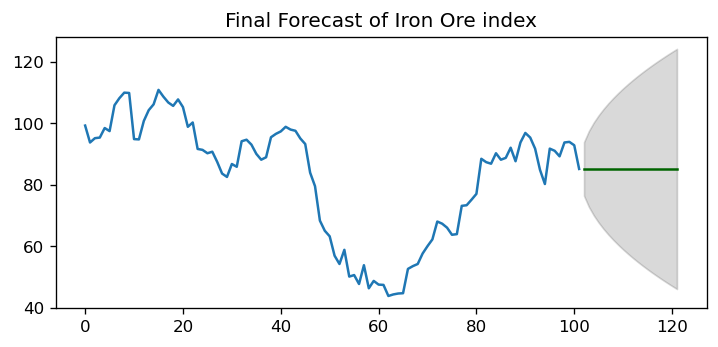

In [53]:
# Forecast
n_periods = 20 
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df), len(df)+n_periods)

# make series for plotting purpose defifnig confidence interval as lower series and upper series
fc_series = pd.Series(fc, index=index_of_fc)
#Lower bond
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
#Upper bond
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Iron Ore index")
plt.show()
